# Facility location assignment

Instructor: Frans de Ruiter

For assignment and data, see https://www.fransderuiter.com/JADS/

***

### Setup

In [1]:
import numpy as np
import pandas as pd
from pyomo.environ import *
import matplotlib.pyplot as plt # optional for plotting
from matplotlib import cm # optional for plotting

### Read data
Here we load the distance table between the cities.

In [2]:
data_path = "https://www.fransderuiter.com/JADS/Facilitylocation/FacilityLocation.xlsx"
# Create pandas table
distances = pd.read_excel(data_path, sheet_name=0, header=0, skiprows=2, index_col=1)

# Show table
distances.head()

Unnamed: 0  Amsterdam  Antwerp  Athens  Barcelona  Berlin  \
Distance (km)                                                              
Amsterdam             NaN          0      160    3082       1639     649   
Antwerp               NaN        160        0    2766       1465     723   
Athens                NaN       3082     2766       0       3312    2552   
Barcelona             NaN       1639     1465    3312          0    1899   
Berlin                NaN        649      723    2552       1899       0   

               Bern  Brussels  Calais  Cologne  ...  Prague  Rome  Rotterdam  \
Distance (km)                                   ...                            
Amsterdam       875       209     385      280  ...     973  1835         80   
Antwerp         704        46     211      237  ...     870  1660        100   
Athens         2627      3021    2976     2562  ...    2198  2551       2826   
Barcelona       913      1419    1399     1539  ...    1679  1471       1565   
Berlin          986       782     936      575  ...     354  1573        697   

               Strasbourg  Stuttgart  The Hague  Turin  Venice  Vienna  Zurich  
Distance (km)                                                                   
Amsterdam             683        703         56   1264    1449    1196     861  
Antwerp               544        659        139   1090    1275    1180     687  
Athens               2581       2428       3061   2250    1995    1886    2449  
Barcelona            1072       1263       1589    892    1327    1989    1036  
Berlin                801        636        712   1172    1108     666     863  

[5 rows x 38 columns]

Some data processing

In [3]:
#remove 1st column ('unnamed', because there is a comment in first column it was added in the database)
distances = distances.drop(distances.columns[0],1)

# Show table with removed column
distances.head()

Amsterdam  Antwerp  Athens  Barcelona  Berlin  Bern  Brussels  \
Distance (km)                                                                  
Amsterdam              0      160    3082       1639     649   875       209   
Antwerp              160        0    2766       1465     723   704        46   
Athens              3082     2766       0       3312    2552  2627      3021   
Barcelona           1639     1465    3312          0    1899   913      1419   
Berlin               649      723    2552       1899       0   986       782   

               Calais  Cologne  Copenhagen  ...  Prague  Rome  Rotterdam  \
Distance (km)                               ...                            
Amsterdam         385      280         904  ...     973  1835         80   
Antwerp           211      237         861  ...     870  1660        100   
Athens           2976     2562        3414  ...    2198  2551       2826   
Barcelona        1399     1539        2230  ...    1679  1471       1565   
Berlin            936      575         743  ...     354  1573        697   

               Strasbourg  Stuttgart  The Hague  Turin  Venice  Vienna  Zurich  
Distance (km)                                                                   
Amsterdam             683        703         56   1264    1449    1196     861  
Antwerp               544        659        139   1090    1275    1180     687  
Athens               2581       2428       3061   2250    1995    1886    2449  
Barcelona            1072       1263       1589    892    1327    1989    1036  
Berlin                801        636        712   1172    1108     666     863  

[5 rows x 37 columns]

In [4]:
## Show index names
cities = distances.columns
print(cities)

Index(['Amsterdam', 'Antwerp', 'Athens', 'Barcelona', 'Berlin', 'Bern',
       'Brussels', 'Calais', 'Cologne', 'Copenhagen', 'Edinburgh', 'Frankfurt',
       'Geneva', 'Genoa', 'Hamburg', 'Le Havre', 'Lisbon', 'London',
       'Luxembourg', 'Lyon', 'Madrid', 'Marseille', 'Milan', 'Munich',
       'Naples', 'Nice', 'Paris', 'Prague', 'Rome', 'Rotterdam', 'Strasbourg',
       'Stuttgart', 'The Hague', 'Turin', 'Venice', 'Vienna', 'Zurich'],
      dtype='object')


### Model parameters

In [5]:
# Fixed cost for opening a DC (same for each city)
fixed_cost = 150000

# demand equals 100 for each city
demand_per_city = 100

# Supply capacity of each city is 4000
M = 4000

# Create pandas dataframe with supply
city_params_dict = {'supply': M*np.ones(cities.size, int), 
                    'demand': demand_per_city*np.ones(cities.size, int), 
                    'fixed cost': fixed_cost*np.ones(cities.size, int)}
city_params = pd.DataFrame(data=city_params_dict, index = cities)
city_params.head()

supply  demand  fixed cost
Amsterdam    4000     100      150000
Antwerp      4000     100      150000
Athens       4000     100      150000
Barcelona    4000     100      150000
Berlin       4000     100      150000

In [6]:
# extract the fixed costs for a city (in this case "Athens") as follows:
i_1 = 'Athens'
city_params.loc[i_1,'fixed cost']

150000

In [7]:
# extract the fixed costs for a city (in this case "Athens" to "Amsterdam") as follows:
i_1 = 'Athens'
j_1 = 'Amsterdam'
distances[i_1][j_1]

3082

### Model implementation

In [8]:
# TODO
# write your optimization model in the cell here by replacing the XXXX in the cells

# Create model
m = ConcreteModel()

# Variables
m.locations = Var(cities, within=Binary)
m.shipments = Var(cities, cities, within = NonNegativeReals)

# Objective
m.value = Objective(
    expr=sum( XXXX for i in cities)
    + sum( XXXX for i in cities for j in cities)
    , sense=minimize)
    
# Constraints on supplying only when facility is open
m.supply_restriction = ConstraintList()
for i in cities:
    m.supply_restriction.add( XXXX )

# Constraints on demand fulfillment
m.demand_fulfillment = ConstraintList()
for j in cities:
    m.demand_fulfillment.add( XXXX )

NameError: name 'XXXX' is not defined

In [8]:
# Create model
m = ConcreteModel()

# Variables
m.locations = Var(cities, within=Binary)
m.shipments = Var(cities, cities, within = NonNegativeReals)

# Objective
m.value = Objective(
    expr=sum(m.shipments[i,j]*distances[i][j] for i in cities for j in cities)
    + sum(m.locations[i]*city_params.loc[i,'fixed cost'] for i in cities)
    , sense=minimize
             )

# Constraints on demand fulfillment
m.demand_fulfillment = ConstraintList()
for i in cities:
    m.demand_fulfillment.add(sum(m.shipments[j,i] for j in cities) == city_params.loc[i,'demand'])
    
# Constraints on supply only if DC is open
m.supply_restriction = ConstraintList()
for i in cities:
    m.supply_restriction.add(sum(m.shipments[i,j] for j in cities) <= m.locations[i]*city_params.loc[i,'supply'])

### Solve the model

In [9]:
# Optimize
solver = SolverFactory('cbc') # Take the cbc solver, glpk is very slow
status = solver.solve(m,tee=False,) # Set tee to True to see log of the solver

# Print the status of the solved mixed integer linear model once it is done
print("Status = %s \n" % status.solver.termination_condition)

Status = optimal 



### Show the solution


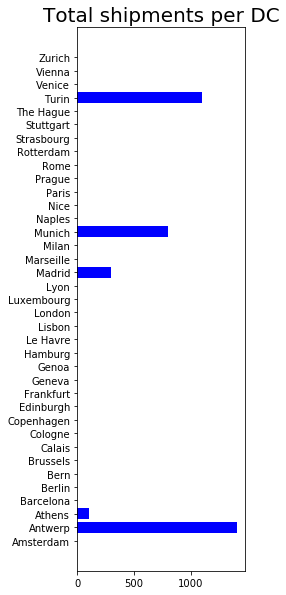

In [46]:
# Show some visualization via tables and/or plots to present your solution.
#TODO (optional): add more visualization, print your solution etc

# Make a vector with all the shipments
totalshipments = [sum(value(m.shipments[i,j]) for j in cities) for i in cities]

plt.figure(figsize=(3,10))

# make a horizontal bar plots
plt.barh(range(cities.size),totalshipments, color="blue",align="center") 

# Use city names on the vertical axis
plt.yticks(range(cities.size),cities,rotation=0)

# Set title and show plot
plt.title('Total shipments per DC',fontsize=20)
plt.show()

---
## Additional visualization (not part of assignment)


Additional packages required. You might need to install these first to make the rest of the code work.

In [26]:
# mapping package
import folium
# geocoder
from geopy.geocoders import Nominatim
# limit geocode requests
from geopy.extra.rate_limiter import RateLimiter
# progress bar
from tqdm import tqdm
# namedtuple objects
from collections import namedtuple


First we find coordinates for each location. This process is called *geocoding*.

In [16]:
# an open source geocoder
geolocator = Nominatim(user_agent="specify_your_app_name_here")
# delay as to not overload the server. Note that a commercial one (like GoogleMaps API can handle much more)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# display progress bar
tqdm.pandas()

# Make a new dataframe
df_cities = pd.DataFrame({"name": cities})
df_cities.loc[
    df_cities.name == "Athens", "name"
] = "Athens, Greece"  # Our open source geocoder is not perfect.. Apparently there is an athens in the US it will use

# start geocoding
df_cities["location"] = df_cities["name"].progress_apply(geocode)
df_cities["lat"] = df_cities["location"].apply(lambda x: x.latitude)
df_cities["long"] = df_cities["location"].apply(lambda x: x.longitude)

# set index and display new dataframe with coordinates
df_cities.set_index("name", inplace=True)
df_cities.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [00:38<00:00,  1.05s/it]


location        lat  \
name                                                                           
Amsterdam       (Amsterdam, Noord-Holland, Nederland, (52.3727...  52.372760   
Antwerp         (Antwerpen, Vlaanderen, België - Belgique - Be...  51.221110   
Athens, Greece  (Αθήνα, Δήμος Αθηναίων, Περιφερειακή Ενότητα Κ...  37.983941   
Barcelona       (Barcelona, Barcelonès, Barcelona, Catalunya, ...  41.382894   
Berlin          (Berlin, 10117, Deutschland, (52.5170365, 13.3...  52.517037   

                     long  
name                       
Amsterdam        4.893604  
Antwerp          4.399708  
Athens, Greece  23.728305  
Barcelona        2.177432  
Berlin          13.388860

A lof of the code below is taken from this blog: https://medium.com/@bobhaffner/folium-lines-with-arrows-25a0fe88e4e

In [19]:
def get_arrows(locations, color="blue", size=3, n_arrows=3):

    """
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    """

    Point = namedtuple("Point", field_names=["lat", "lon"])

    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])

    # getting the rotation needed for our marker.
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90

    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1 : n_arrows + 1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1 : n_arrows + 1]

    arrows = []

    # creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(
            folium.RegularPolygonMarker(
                location=points,
                fill_color=color,
                number_of_sides=3,
                radius=size,
                rotation=rotation,
            ).add_to(some_map)
        )
    return arrows

def get_bearing(p1, p2):

    """
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    """

    long_diff = np.radians(p2.lon - p1.lon)

    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)

    x = np.sin(long_diff) * np.cos(lat2)
    y = np.cos(lat1) * np.sin(lat2) - (np.sin(lat1) * np.cos(lat2) * np.cos(long_diff))
    bearing = np.degrees(np.arctan2(x, y))

    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing

### Produce the map

In [49]:
some_map = folium.Map(tiles='OpenStreetMap')
cent_coord = [df_cities.loc["Amsterdam"]["lat"], df_cities.loc["Amsterdam"]["long"]]
bounds = []

for i in cities:
    for j in cities:
        if value(m.shipments[i, j]) != 0:
            origin = i
            destination = j
            if origin == 'Athens':
                origin = 'Athens, Greece'
            if destination == 'Athens':
                destination = 'Athens, Greece'
            origin_coord = [df_cities.loc[origin]["lat"], df_cities.loc[origin]["long"]]
            destination_coord = [df_cities.loc[destination]["lat"], df_cities.loc[destination]["long"]]
            bounds.append([origin_coord])
            folium.Circle(
                radius=25000,
                location=destination_coord,
                popup=i,
                color="#3186cc",
                fill=True,
                fill_color="#3186cc",
            ).add_to(some_map)
            folium.Circle(
                radius=80000,
                location=origin_coord,
                popup=j,
                color="crimson",
                fill=False,
                fill_color=None,
            ).add_to(some_map)
            # folium.Marker(location=da_coord, popup=da, icon=folium.Icon(color='red')).add_to(some_map)
            folium.PolyLine(locations=[origin_coord,destination_coord], color="grey").add_to(
                some_map
            )
            arrows = get_arrows(locations=[origin_coord, destination_coord], n_arrows=1)
            for arrow in arrows:
                arrow.add_to(some_map)
some_map.fit_bounds(
    bounds,
    padding_top_left=None,
    padding_bottom_right=None,
    padding=None,
    max_zoom=None,
)

folium.TileLayer('cartodbdark_matter').add_to(some_map)
folium.TileLayer('cartodbpositron').add_to(some_map)
# other mapping code (e.g. lines, markers etc.)
folium.LayerControl().add_to(some_map)

some_map